<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/Proyecto_PADP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: "Credit Risk"
## Grupo: B
## Autor: Gustavo Hernández De la Cruz
## Matrícula: 261551
## Fecha: 24/10/2025

# **1. Introducción**

## - Descripción del problema: ¿Qué queremos analizar o predecir?
Dentro de la industria bancaria, siempre ha sido relevante el uso de modelos de churn y scoring, con el propósito de reducir pérdidas en la captación de nuevos clientes y la otorgación de diferentes productos financieros, permitiendo tener una mejor cartera reduciendo la probabilidad de impago, adicional de mejorar la experiencia de usuario con una herramienta capaz de emitir una respuesta en tiempo real, con resultados confiables y que sea fácil de utilizar.
## - Objetivo del análisis: ¿Qué impacto tendrá este análisis?
El presente proyecto tiene como propósito implementar un modelo supervisado de machine learning tomando un conjunto de datos que hace referencia a información histórica de créditos otorgados a diferentes personas, dónde el objetivo es predecir si habrá impago o no basado en el perfil asociado al cliente.
## - Fuente de datos: ¿De dónde provienen los datos?
Los datos provienen de un dataset público en Kaggle, que recopila los registros históricos de diferentes créditos otorgados. \
[Enlace](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)


# **2. Descripción del dataset**

## - Explicación de la fuente de datos: ¿Cuáles son las fuentes de datos?, ¿Qué formato tienen los datos (CSV, SQL, API, etc.)?, ¿Cuántas observaciones y variables contiene el dataset?
El conjunto de datos seleccionado llamado "credit_risk_dataset", que es un archivo separado por comas (csv), cuenta con un total de 32,581 registros y 12 columnas.

## - Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (bibiotecas, etc.)
Para la carga de datos, se utilizó la API de Kaggle que permite conectarse a la plataforma a través de la librería "kagglehub" y extraer el conjunto de datos sin necesidad de hacer la descarga directa del archivo en el equipo local y después colocarla en la ruta dónde se desea trabajar, simplemente se copia la ruta indicada en la página de Kaggle para realizar la conexión

In [1]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import ks_2samp
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import make_column_selector

In [2]:
# Creamos una función para mostrar la completitud de un df
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"nulos"})
    comple["completitud"]=(1-comple["nulos"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [3]:
# Download latest version
path = kagglehub.dataset_download("laotse/credit-risk-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'credit-risk-dataset' dataset.
Path to dataset files: /kaggle/input/credit-risk-dataset


In [4]:
# List files in the dataset folder
print("Files:", os.listdir(path))

Files: ['credit_risk_dataset.csv']


In [5]:
# Load the CSV
df = pd.read_csv(os.path.join(path, "credit_risk_dataset.csv"))

In [6]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Variables:

* person_age -> Edad del Cliente
* person_income -> Ingresos Anuales del Cliente
* person_home_ownership -> Estatus con respecto a la vivienda en la que reside
* person emp length - Tiempo de antigüedad en su empleo actual (en años)
* loan_intent - Motivo al que se destina el crédito
* loan_grade - Nivel del crédito (categoría creada por el emisor)
* loan_amnt - Monto del crédito
* loan_int_rate - Interés asociado al crédito
* loan_percent_income - Porcentaje de los ingresos que representa el crédito
* cb_person_default_on_file - Indica si ha tenido incumplimientos anteriormente
* cb_preson_cred_hist_length - Años de historial crediticio
* loan_status - Target (0 si no ha incumplido 1 si ha incumplido)

#**3. Preguntas de análisis descriptivo**

* ¿Cómo se distribuyen los ingresos anuales (person_income)?
* ¿Qué tan dispersa está la tasa de interés (loan_int_rate)? ¿Existen valores extremos?
* ¿Cuáles son los motivos más frecuentes de los créditos (loan_intent)?

#**4. Métricas de calidad de los datos**

## Unicidad: Duplicados

In [8]:
df[df.duplicated()].sort_values(by=['person_age','person_income','person_home_ownership','person_emp_length'])

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
16835,21,8088,RENT,NaN,MEDICAL,C,1200,15.23,0,0.15,Y,2
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
17601,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
17642,21,20000,RENT,0.0,MEDICAL,A,2000,NaN,0,0.10,N,3
17283,21,21600,OWN,NaN,VENTURE,A,7125,6.99,0,0.33,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16
31947,40,38000,RENT,4.0,DEBTCONSOLIDATION,D,7000,15.99,1,0.18,N,16
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32279,43,11340,RENT,4.0,EDUCATION,C,1950,NaN,1,0.17,N,11


En este caso, al no tener un ID por persona, ya que nuestra unidad muestral es por crédito, consideramos como duplicados a aquellos registros dónde todos los valores son iguales, de este modo, obtenemos un total de 165 registros duplicados en este dataset. Una alternativa podría ser eliminar dichos registros ya que al ser los mismos, no aportan información nueva al modelo.

In [9]:
df = df.drop_duplicates(keep='first')
df.shape

(32416, 12)

## Completitud: Conteo y Porcentaje de Valores Faltantes

In [10]:
completitud(df)

,columna,nulos,completitud
0,loan_int_rate,3095,90.452246
1,person_emp_length,887,97.263697
2,person_income,0,100.000000
3,person_age,0,100.000000
4,person_home_ownership,0,100.000000
5,loan_intent,0,100.000000
6,loan_grade,0,100.000000
7,loan_amnt,0,100.000000
8,loan_status,0,100.000000
9,loan_percent_income,0,100.000000


En este cuadro podemos ver el resumen de completitud por cada variable en el df, en este caso observamos que solo las columnas **person_emp_length** y **loan_int_rate** tienen valores nulos, siendo el 2.7% y 9.5% respectivamente. Al ser porcentajes relativamente pequeños se podría optar por imputar y verificar que tanto cambia la distribución, en caso de que el cambio sea significativo otra alternativa sería eliminar esos registros y evitar sobreajuste o gran variabilidad en los resultados del modelo. Por lo que se analizarán ambos escenarios

In [11]:
mean_emp = df['person_emp_length'].mean()
median_emp = df['person_emp_length'].median()
mode_emp = df['person_emp_length'].mode()

In [12]:
sample1 = df['person_emp_length'].to_numpy()
sample1 = sample1[~np.isnan(sample1)]
sample2 = df['person_emp_length'].fillna(mean_emp).to_numpy()
samples = [sample1, sample2]
names = ['Antigüedad con Nulos', 'Antigüedad sin Nulos (Media)']

In [13]:
stat, pvalue = ks_2samp(sample1, sample2)
print(f'stat: {stat}, p_value: {pvalue}')

stat: 0.014857911253423284, p_value: 0.0017057644313243018


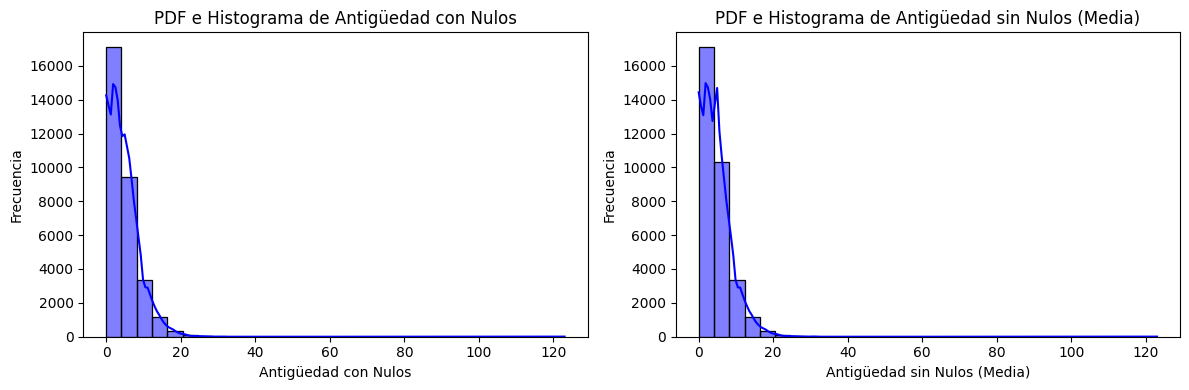

In [14]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4))
for i, (arr, name) in enumerate(zip(samples, names), 1):
    plt.subplot(1, 2, i)  # un gráfico por fila
    sns.histplot(arr, kde=True, bins=30, color='blue')
    plt.title(f'PDF e Histograma de {name}', fontsize=12)
    plt.xlabel(name, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

En este caso, observamos que las gráficas lucen muy similares con la imputación, sin embargo, el valor de p-value es menor a alpha = 0.05, por lo que se descarta la hipotesis nula de que ambas distribuciones son iguales, por tanto esta imputación podría afectar al modelo

In [15]:
sample2 = df['person_emp_length'].fillna(median_emp).to_numpy()
samples = [sample1, sample2]
names = ['Antigüedad con Nulos', 'Antigüedad sin Nulos (Mediana)']

In [16]:
stat, pvalue = ks_2samp(sample1, sample2)
print(f'stat: {stat}, p_value: {pvalue}')

stat: 0.012505119348748539, p_value: 0.013378937946957985


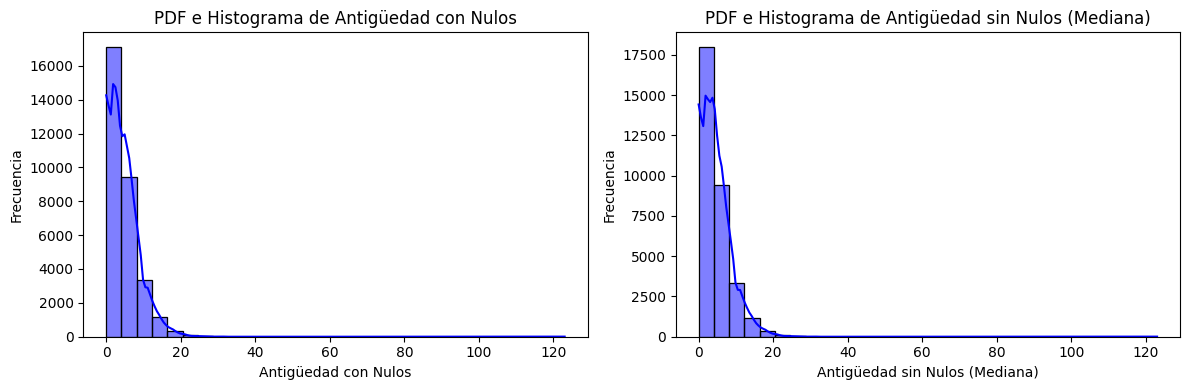

In [17]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4))
for i, (arr, name) in enumerate(zip(samples, names), 1):
    plt.subplot(1, 2, i)  # un gráfico por fila
    sns.histplot(arr, kde=True, bins=30, color='blue')
    plt.title(f'PDF e Histograma de {name}', fontsize=12)
    plt.xlabel(name, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

Similar al caso anterior, el p_value es menor a alpha, por lo que se descarta

In [18]:
sample2 = df['person_emp_length'].fillna(mode_emp[0]).to_numpy()
samples = [sample1, sample2]
names = ['Antigüedad con Nulos', 'Antigüedad sin Nulos (Moda)']

In [19]:
stat, pvalue = ks_2samp(sample1, sample2)
print(f'stat: {stat}, p_value: {pvalue}')

stat: 0.02381691930652413, p_value: 2.6204307164250332e-08


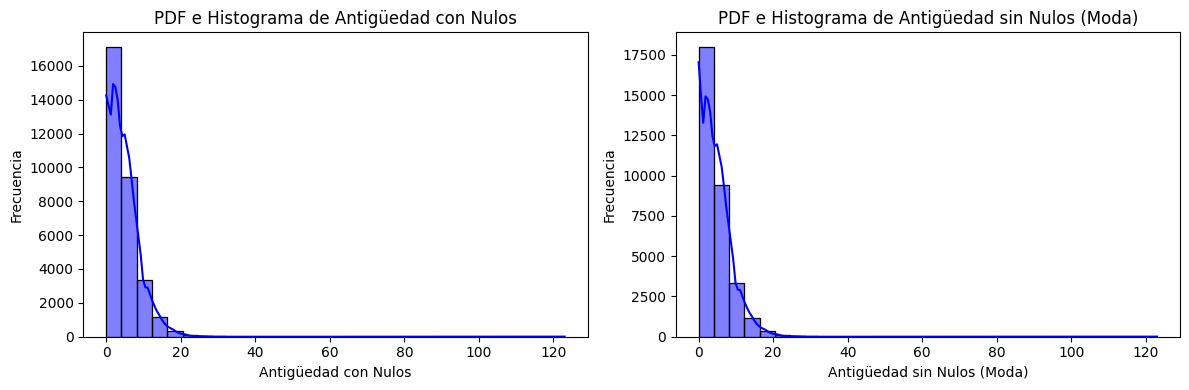

In [20]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4))
for i, (arr, name) in enumerate(zip(samples, names), 1):
    plt.subplot(1, 2, i)  # un gráfico por fila
    sns.histplot(arr, kde=True, bins=30, color='blue')
    plt.title(f'PDF e Histograma de {name}', fontsize=12)
    plt.xlabel(name, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

Imputar por la moda, es el valor menos adecuado, ya que es la que mayor diferencia muestra en el p_value esperado

In [21]:
df['person_emp_length'] = df['person_emp_length'].fillna(median_emp)

/tmp/ipython-input-837213502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_emp_length'] = df['person_emp_length'].fillna(median_emp)


En este caso, imputamos por la mediana que si bien no cumple la pruba KS, es la que mas se acerca a la distribución original

Ahora hacemos el análisis similar para la otra variable con nulos que es el interés

In [22]:
mean_rate = df['loan_int_rate'].mean()
median_rate = df['loan_int_rate'].median()
mode_rate = df['loan_int_rate'].mode()

In [23]:
sample1 = df['loan_int_rate'].to_numpy()
sample1 = sample1[~np.isnan(sample1)]
sample2 = df['loan_int_rate'].fillna(mean_rate).to_numpy()
samples = [sample1, sample2]
names = ['Tasa Interés con Nulos', 'Tasa Interés sin Nulos (Media)']

In [24]:
stat, pvalue = ks_2samp(sample1, sample2)
print(f'stat: {stat}, p_value: {pvalue}')

stat: 0.04827442991292258, p_value: 1.2856445397393231e-31


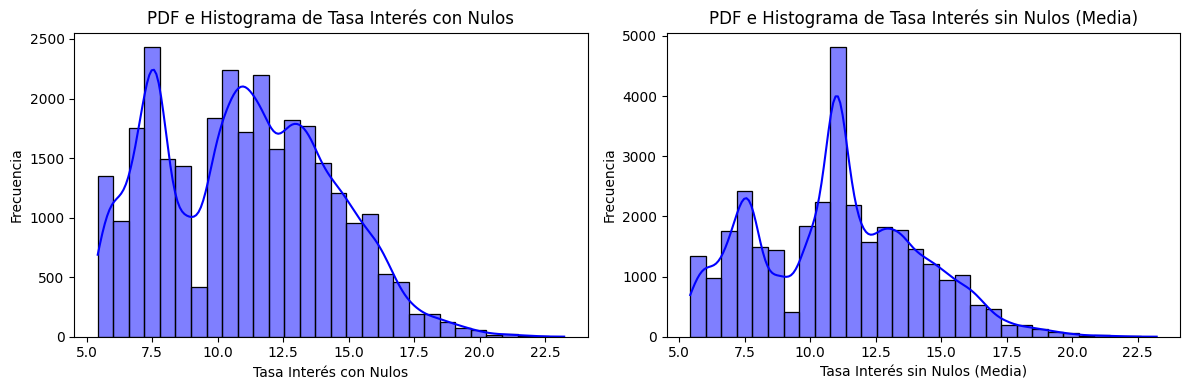

In [25]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4))
for i, (arr, name) in enumerate(zip(samples, names), 1):
    plt.subplot(1, 2, i)  # un gráfico por fila
    sns.histplot(arr, kde=True, bins=30, color='blue')
    plt.title(f'PDF e Histograma de {name}', fontsize=12)
    plt.xlabel(name, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

En este caso como en los anteriores, la prueba indica que las distribuciones son significativamente diferentes

In [26]:
sample2 = df['loan_int_rate'].fillna(median_rate).to_numpy()
samples = [sample1, sample2]
names = ['Tasa Interés con Nulos', 'Tasa Interés sin Nulos (Mediana)']

In [27]:
stat, pvalue = ks_2samp(sample1, sample2)
print(f'stat: {stat}, p_value: {pvalue}')

stat: 0.047203112041667716, p_value: 3.0100358278158357e-30


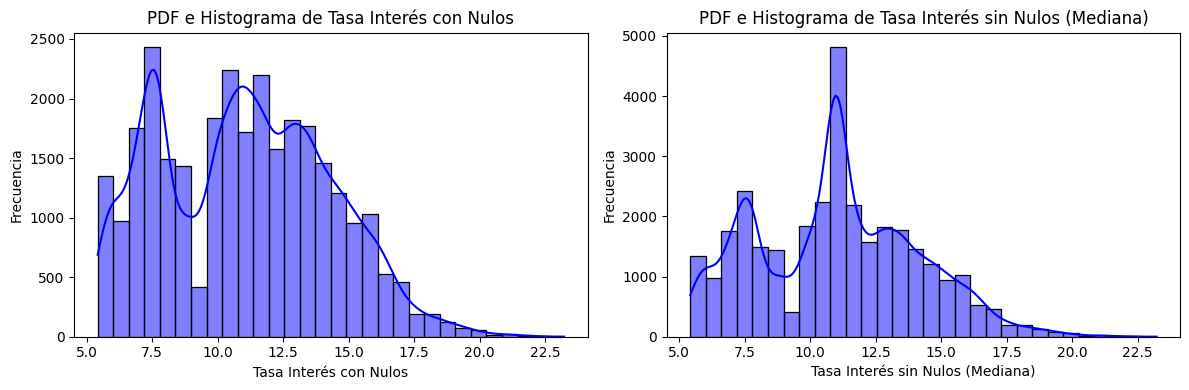

In [28]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4))
for i, (arr, name) in enumerate(zip(samples, names), 1):
    plt.subplot(1, 2, i)  # un gráfico por fila
    sns.histplot(arr, kde=True, bins=30, color='blue')
    plt.title(f'PDF e Histograma de {name}', fontsize=12)
    plt.xlabel(name, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

Las pruebas indican la diferencia entre ambas distribuciones

In [29]:
sample2 = df['loan_int_rate'].fillna(mode_rate[0]).to_numpy()
samples = [sample1, sample2]
names = ['Tasa Interés con Nulos', 'Tasa Interés sin Nulos (Mediana)']

In [30]:
stat, pvalue = ks_2samp(sample1, sample2)
print(f'stat: {stat}, p_value: {pvalue}')

stat: 0.07601146829391908, p_value: 8.337477387690599e-78


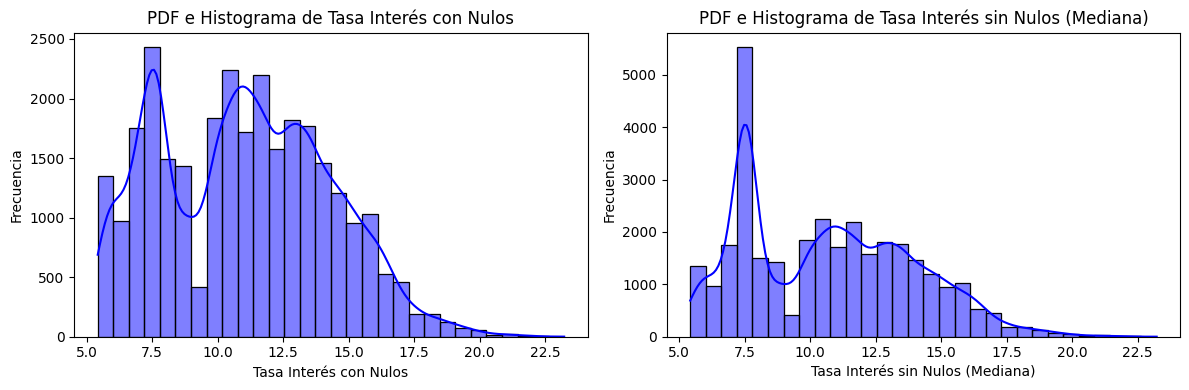

In [31]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4))
for i, (arr, name) in enumerate(zip(samples, names), 1):
    plt.subplot(1, 2, i)  # un gráfico por fila
    sns.histplot(arr, kde=True, bins=30, color='blue')
    plt.title(f'PDF e Histograma de {name}', fontsize=12)
    plt.xlabel(name, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

En este caso, ninguna de las imputaciones es buena, pues cambia significativamente la distribución, lo que podría provocar un sesgo en el modelo

In [32]:
df = df.dropna(subset='loan_int_rate')
df.shape

(29321, 12)

## Consistencia: tipos de datos correctos, formatos esperados.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29321 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29321 non-null  int64  
 1   person_income               29321 non-null  int64  
 2   person_home_ownership       29321 non-null  object 
 3   person_emp_length           29321 non-null  float64
 4   loan_intent                 29321 non-null  object 
 5   loan_grade                  29321 non-null  object 
 6   loan_amnt                   29321 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 29321 non-null  int64  
 9   loan_percent_income         29321 non-null  float64
 10  cb_person_default_on_file   29321 non-null  object 
 11  cb_person_cred_hist_length  29321 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


In [34]:
# cambiamos el tipo de dato de las variables categóricas, ya que están como object y como int64
df['person_home_ownership'] = df['person_home_ownership'].astype('category')
df['loan_intent'] = df['loan_intent'].astype('category')
df['loan_grade'] = df['loan_grade'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].astype('category')

In [35]:
cols_cat = df.select_dtypes(include=["category"]).columns.tolist()
for col in cols_cat:
  print(df[col].value_counts(),'\n')

person_home_ownership
RENT        14838
MORTGAGE    12054
OWN          2336
OTHER          93
Name: count, dtype: int64 

loan_intent
EDUCATION            5820
MEDICAL              5426
VENTURE              5119
PERSONAL             4994
DEBTCONSOLIDATION    4683
HOMEIMPROVEMENT      3279
Name: count, dtype: int64 

loan_grade
A    9713
B    9337
C    5809
D    3309
E     880
F     214
G      59
Name: count, dtype: int64 

loan_status
0    22873
1     6448
Name: count, dtype: int64 

cb_person_default_on_file
N    24122
Y     5199
Name: count, dtype: int64 



En cuanto a las variables categóricas, no se observan valores inválidos, solo se ajustó al tipo de dato adecuado para que más adelante no se manejen como números en el caso de la target

In [36]:
#Esta función fue creada para normalizar la variable loan_grade
def mapear_loan_grade(valor):
    if valor in ['D','E','F', 'G']:
        return 'D-G'
    else:
        return valor

In [37]:
#Esta función fue creada para normalizar la variable loan_grade
def mapear_ownership(valor):
    if valor in ['OWN', 'OTHER']:
        return 'OTHER'
    else:
        return valor

In [38]:
df['loan_grade'] = df['loan_grade'].apply(mapear_loan_grade)
df['person_home_ownership'] = df['person_home_ownership'].apply(mapear_ownership)

## 4.4 Validez: rangos adecuados.

In [39]:
cols_num = df.select_dtypes(include=["number"]).columns.tolist()
for col in cols_num:
  print(f'{col}:')
  print(f'Max: {df[col].max()}')
  print(f'Min: {df[col].min()}\n')

person_age:
Max: 144
Min: 20

person_income:
Max: 6000000
Min: 4000

person_emp_length:
Max: 123.0
Min: 0.0

loan_amnt:
Max: 35000
Min: 500

loan_int_rate:
Max: 23.22
Min: 5.42

loan_percent_income:
Max: 0.83
Min: 0.0

cb_person_cred_hist_length:
Max: 30
Min: 2



En este caso se observan posibles inconsistencias en los valores de la edad, ya que se observa que el valor máximo es de 144 años, lo cuál no es imposible pero si poco probable, por lo que lo más seguro es que se trate de algún error al registrar el valor, por otro lado también se observa una inconsistencia en la variable person_emp_length, ya que el valor máximo es 123 años de antigüedad en su empleo, lo que no tiene sentido. En algunos modelos, podría generar problemas de ajustes ya que estos serían considerados datos atípicos

# **5. Análisis descriptivo de los datos**

In [40]:
df[cols_num].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,29321.000000,2.932100e+04,29321.000000,29321.000000,29321.000000,29321.000000,29321.00000
mean,27.726544,6.602976e+04,4.768050,9587.635142,11.017265,0.170141,5.79513
std,6.306105,6.192304e+04,4.100983,6316.319639,3.241680,0.106900,4.03579
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.00000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.00000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.00000
75%,30.000000,7.910000e+04,7.000000,12250.000000,13.470000,0.230000,8.00000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.00000


In [41]:
def get_frequency(df, col):
  aux1 = df[col].value_counts().reset_index()
  aux2 = df[col].value_counts(1).reset_index()
  df = aux1.merge(aux2, on=col, how='inner')
  return df

In [42]:
for col in cols_cat:
  print(get_frequency(df, col),'\n')

  person_home_ownership  count  proportion
0                  RENT  14838    0.506054
1              MORTGAGE  12054    0.411105
2                 OTHER   2429    0.082842 

         loan_intent  count  proportion
0          EDUCATION   5820    0.198493
1            MEDICAL   5426    0.185055
2            VENTURE   5119    0.174585
3           PERSONAL   4994    0.170322
4  DEBTCONSOLIDATION   4683    0.159715
5    HOMEIMPROVEMENT   3279    0.111831 

  loan_grade  count  proportion
0          A   9713    0.331264
1          B   9337    0.318441
2          C   5809    0.198117
3        D-G   4462    0.152178 

  loan_status  count  proportion
0           0  22873    0.780089
1           1   6448    0.219911 

  cb_person_default_on_file  count  proportion
0                         N  24122    0.822687
1                         Y   5199    0.177313 



En algunas variables como la target o impagos anteriores, se observa un claro desbalanceo entre los valores, en otros casos como en el grado del crédito se observa que hay categorías con poca frecuencia

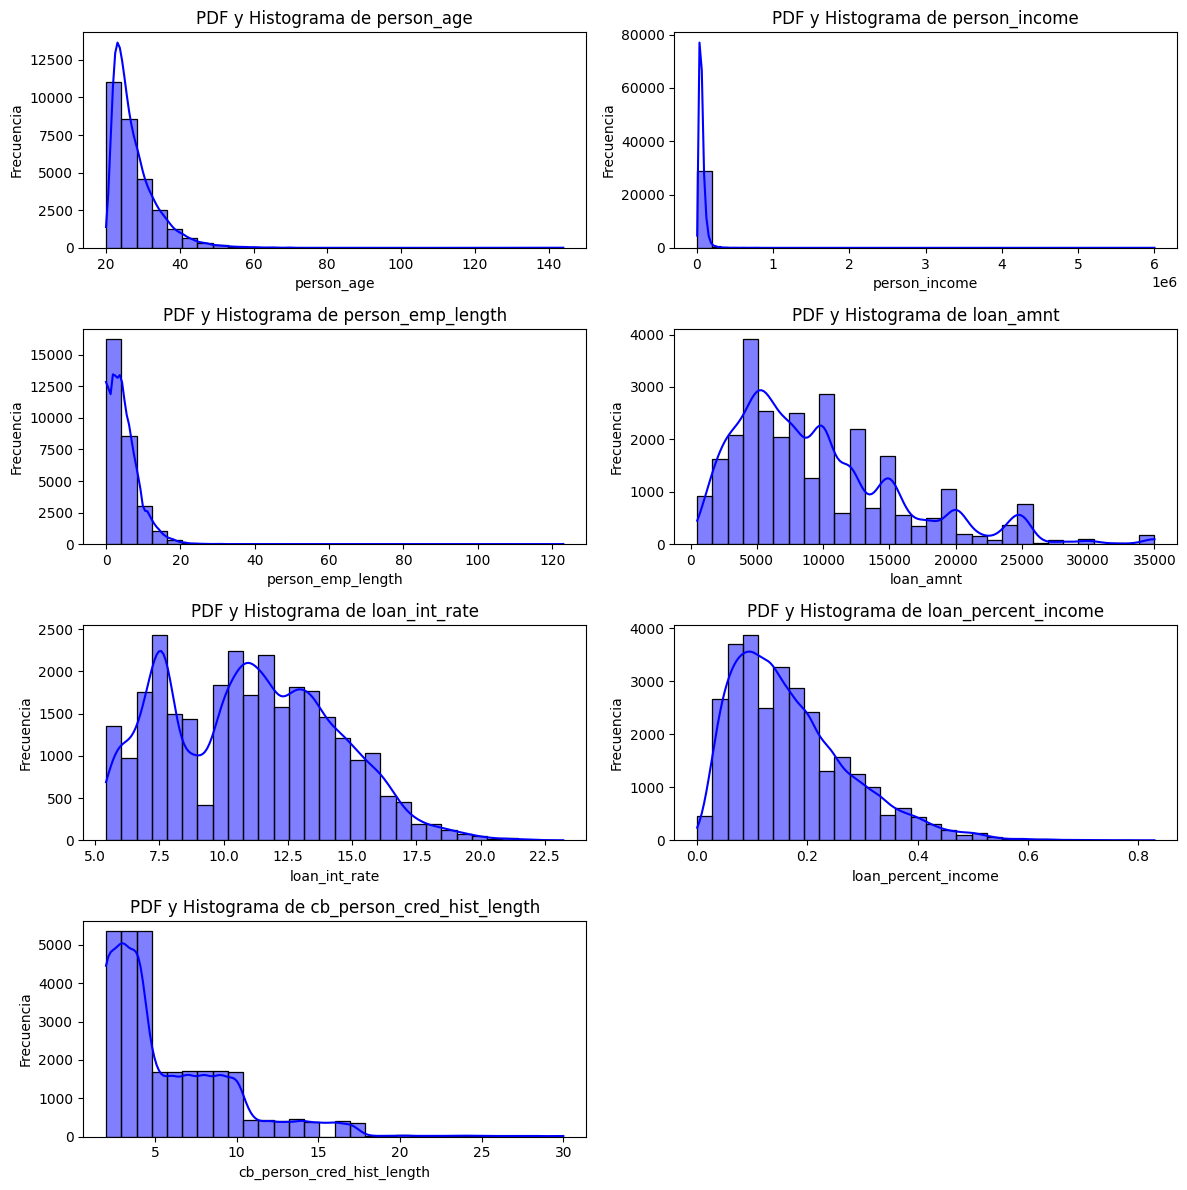

In [43]:
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4*3))
for i, col in enumerate(cols_num, 1):
    plt.subplot(4, 2, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

De las distribuciones de las variables numéricas, no se observan normales, sin embargo, dado que no se trata de un modelo de regresión si no de clasificación, se espera que no haya problemas con el desempeño del modelo

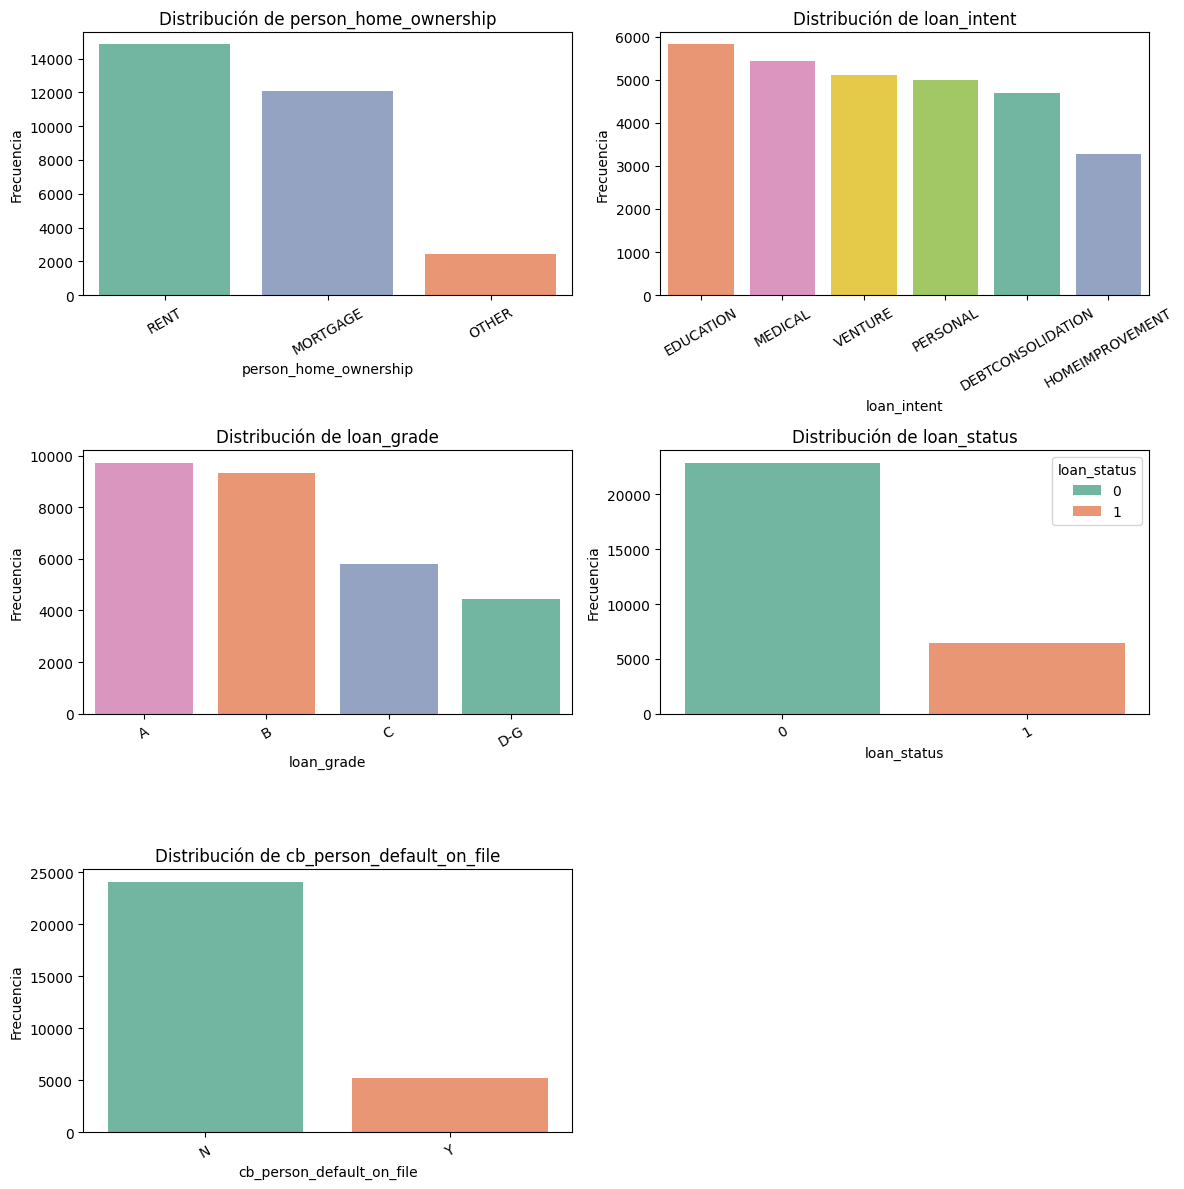

In [44]:
# Crear gráficos de barras
plt.figure(figsize=(12, 4*3))

for i, col in enumerate(cols_cat, 1):
    plt.subplot(3, 2, i)  # un gráfico por fila
    sns.countplot(data=df, x=col, hue=col, palette="Set2", order=df[col].value_counts().index)

    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.xticks(rotation=30)  # rotar etiquetas si son largas

plt.tight_layout()
plt.show()

Previamente se hizo una normalización al agrupar ciertas clases en algunas variables, lo que ayudó a disminuir el desbalanceo, sin embargo, en la target sigue siendo notorio

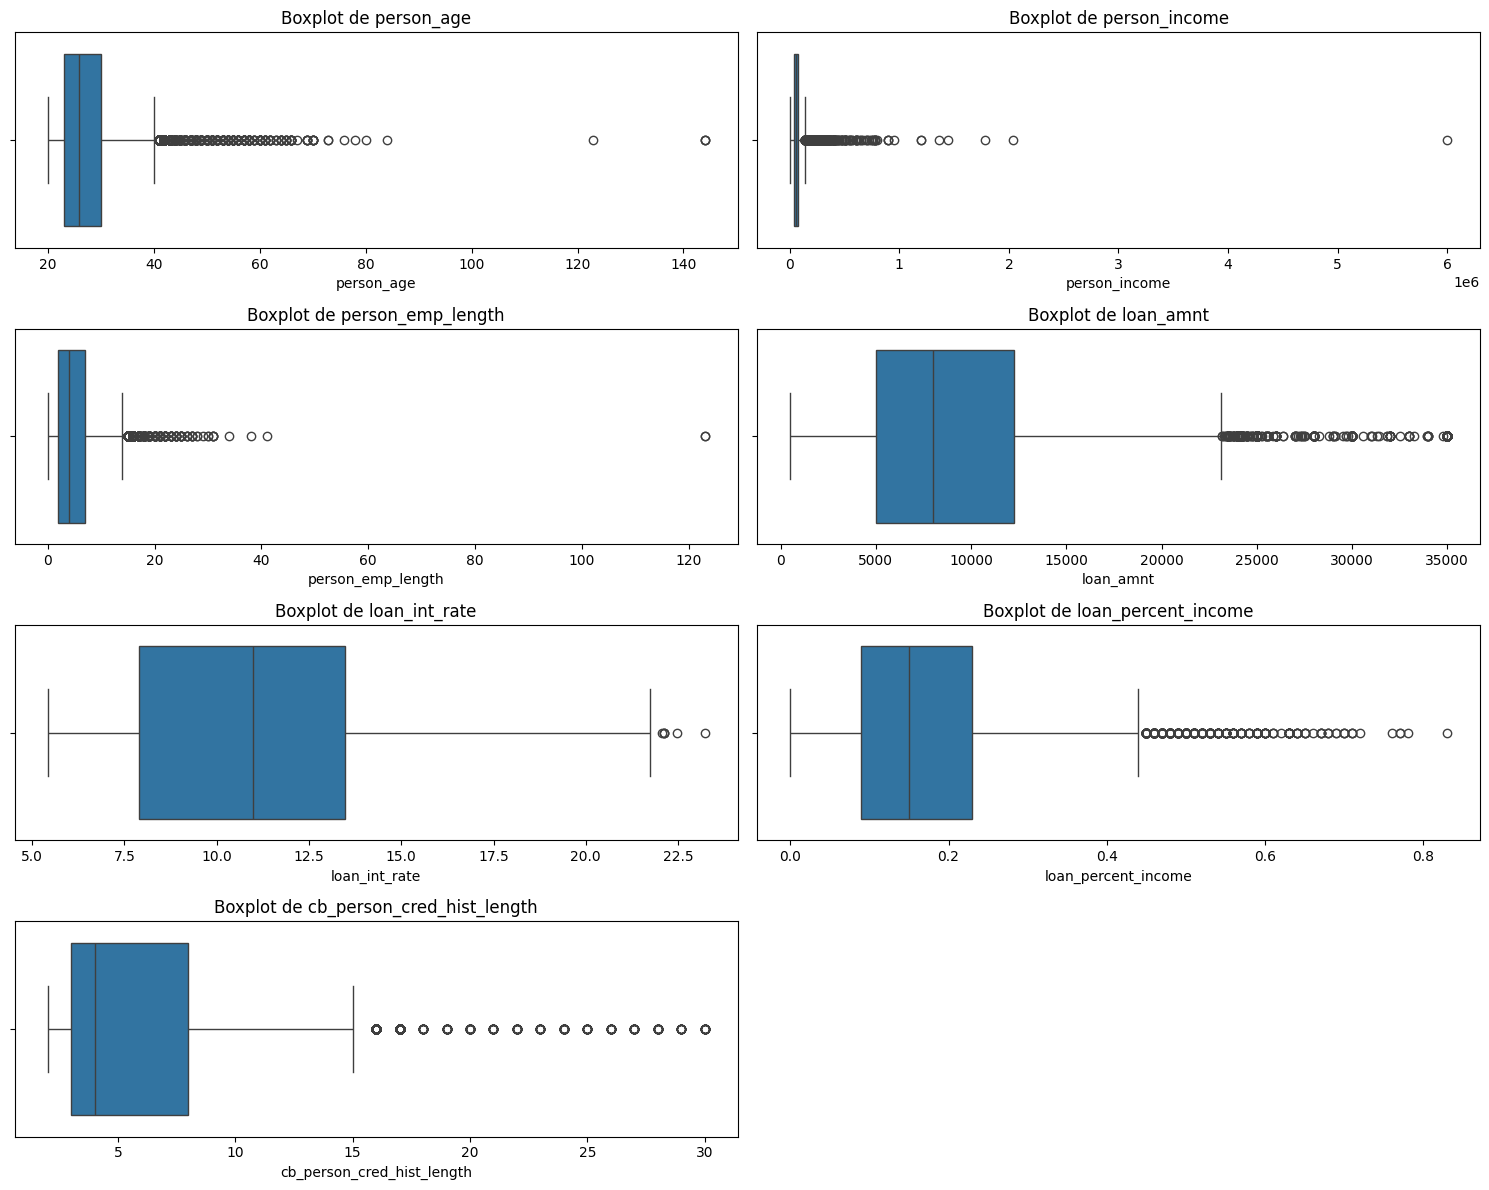

In [45]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 12))
# Crear boxplots para cada columna numérica
for i, col in enumerate(cols_num, 1):
    plt.subplot(4, 2, i)  # n filas, 3 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Dada la naturaleza del problema, se observa que existen outliers en todas las variables numéricas, por lo que de momento se decide no eliminarlas y en caso de que el modelo no presente buenos resultados, se regresará a este punto para darles tratamiento

In [46]:
# Calcular la matriz de correlación
corr_matrix = df[cols_num].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
corr_matrix

Matriz de correlación:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.177318,0.163830,0.053939,0.011760,-0.041981,0.859882
person_income,0.177318,1.000000,0.137310,0.268223,0.000878,-0.252973,0.115732
person_emp_length,0.163830,0.137310,1.000000,0.111649,-0.053969,-0.055075,0.144827
loan_amnt,0.053939,0.268223,0.111649,1.000000,0.146937,0.573016,0.045233
loan_int_rate,0.011760,0.000878,-0.053969,0.146937,1.000000,0.120207,0.015896
loan_percent_income,-0.041981,-0.252973,-0.055075,0.573016,0.120207,1.000000,-0.030276
cb_person_cred_hist_length,0.859882,0.115732,0.144827,0.045233,0.015896,-0.030276,1.000000


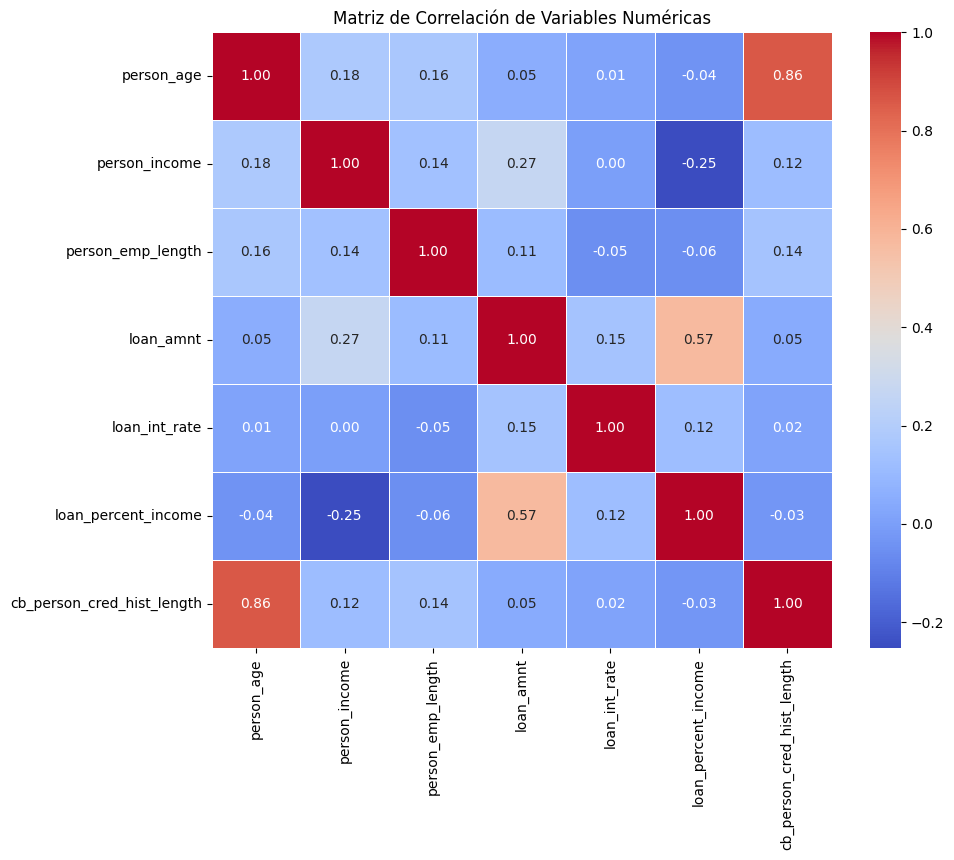

In [47]:
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

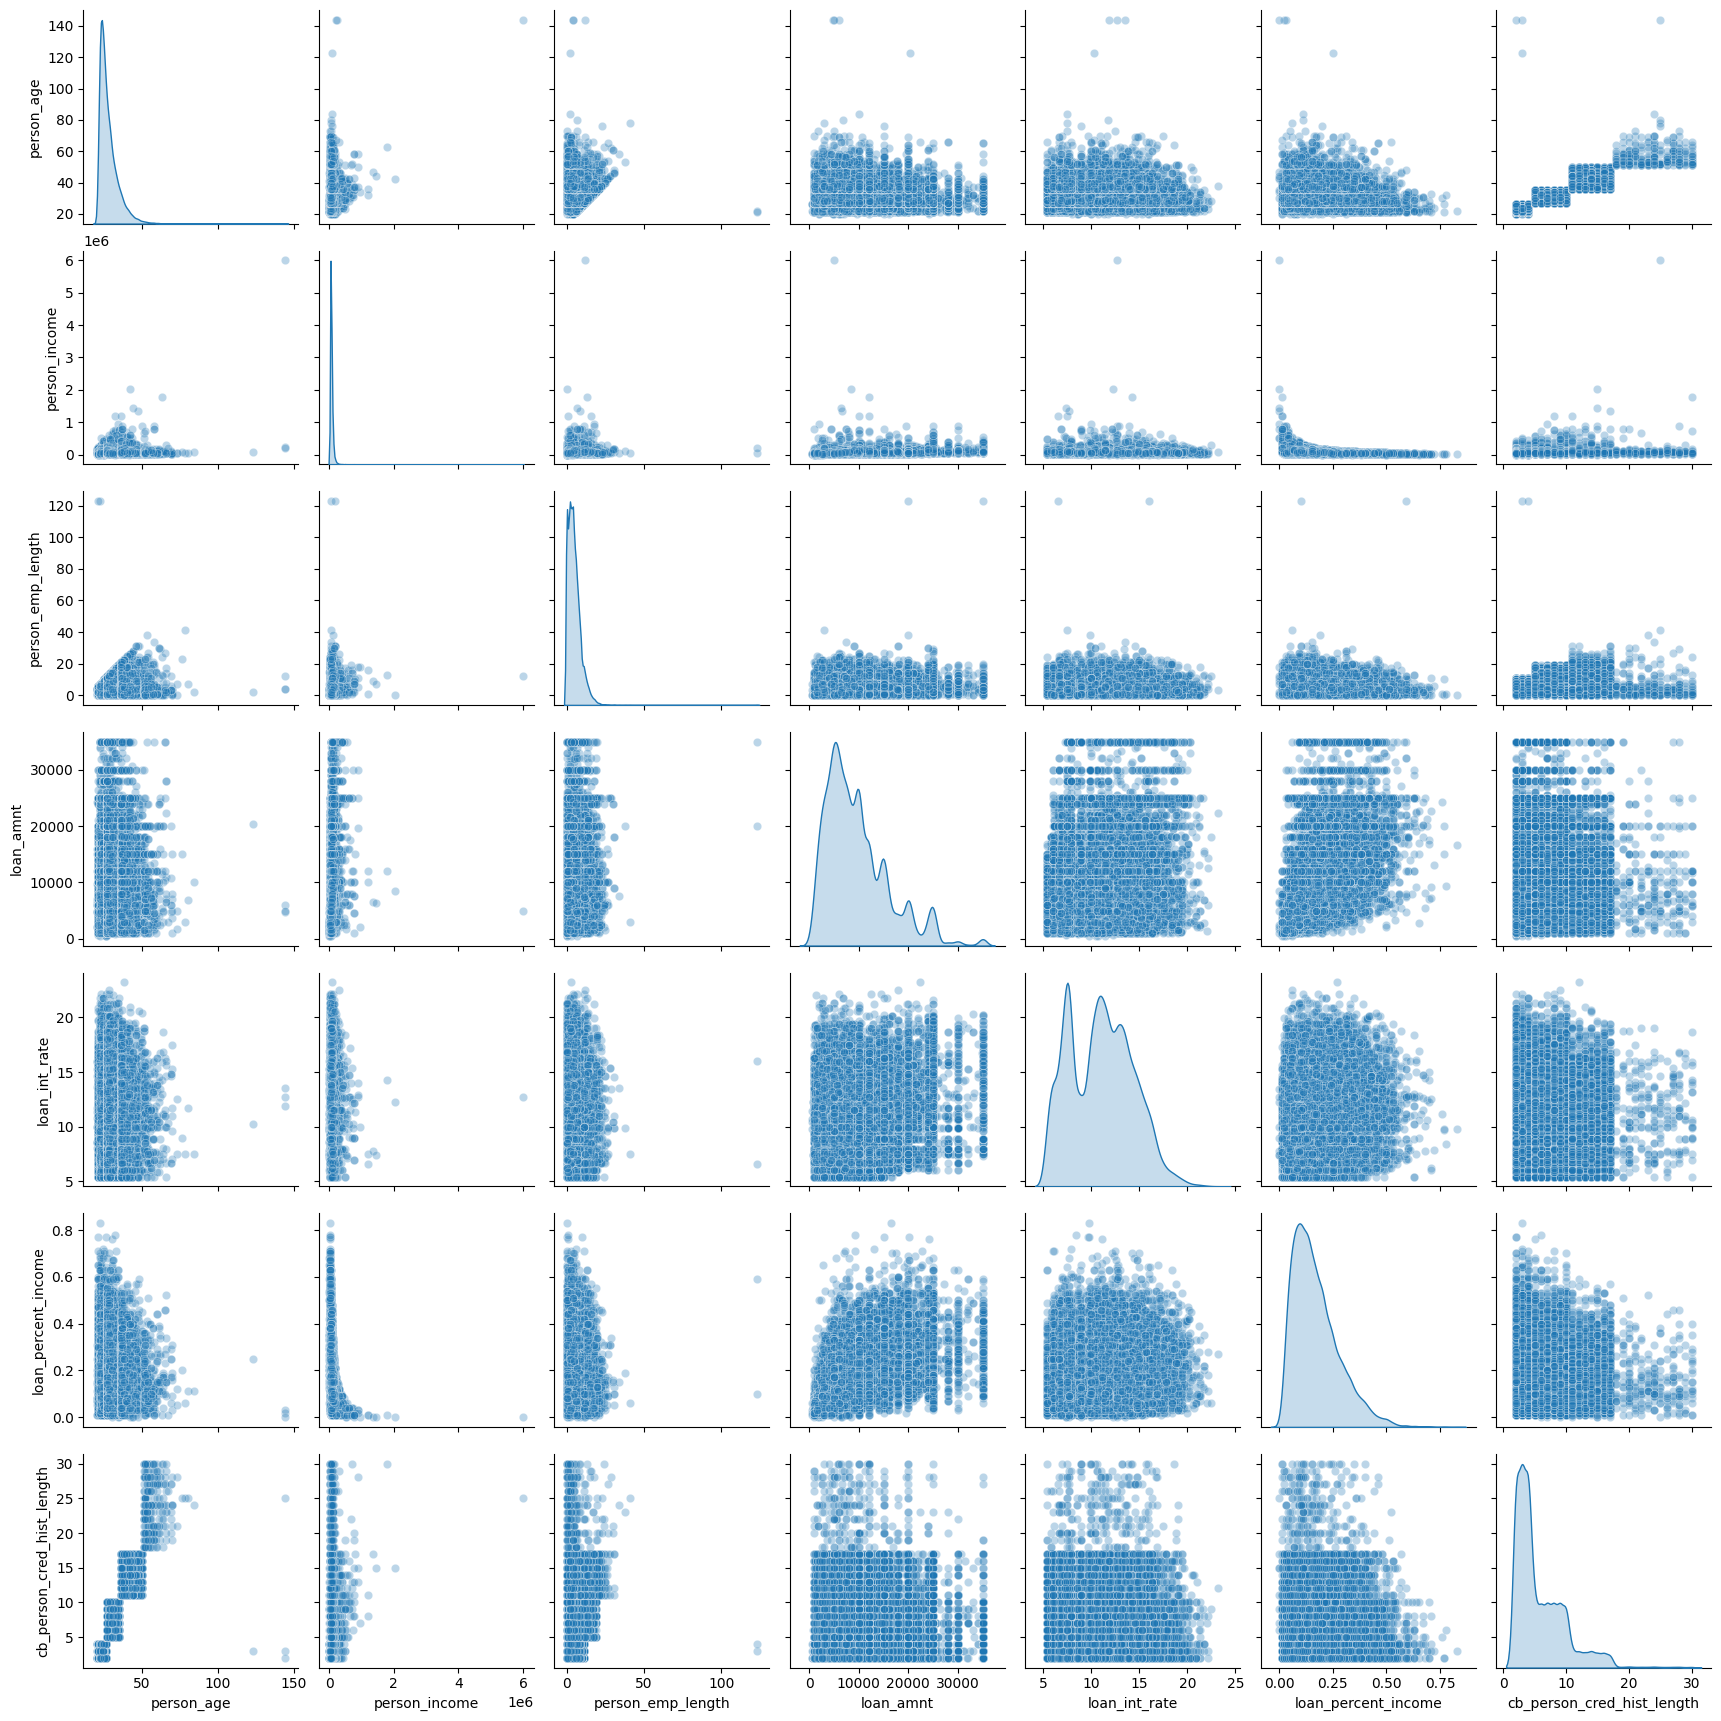

In [48]:
# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df[cols_num], plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

In [49]:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

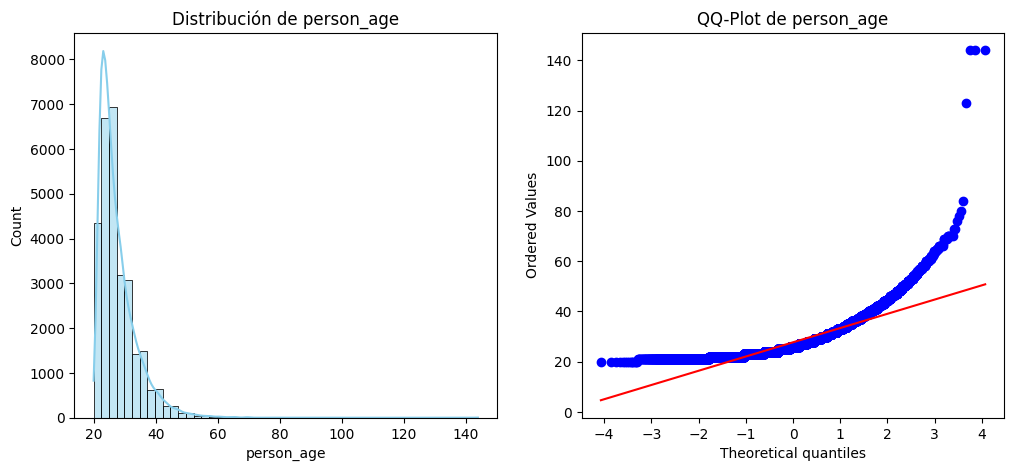


Pruebas de normalidad para la columna: person_age
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 1279.67217
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


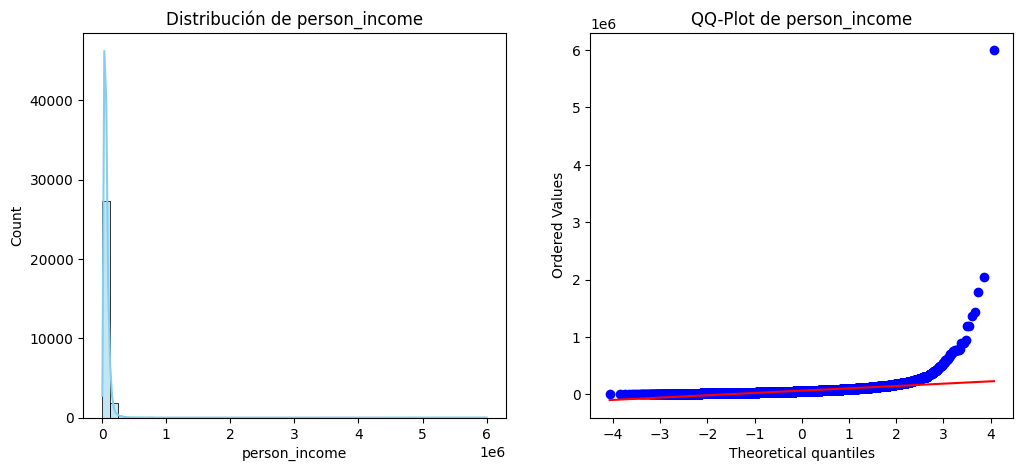


Pruebas de normalidad para la columna: person_income
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 2521.92170
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


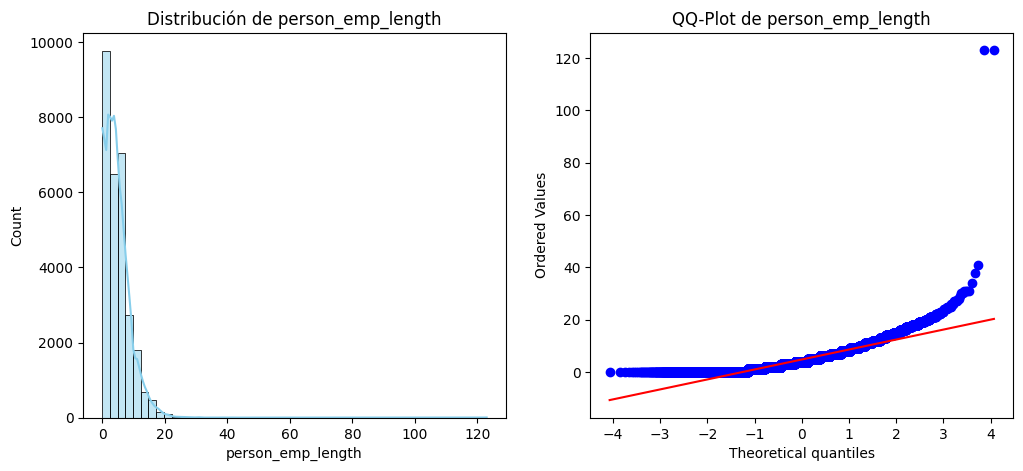


Pruebas de normalidad para la columna: person_emp_length
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 646.27920
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


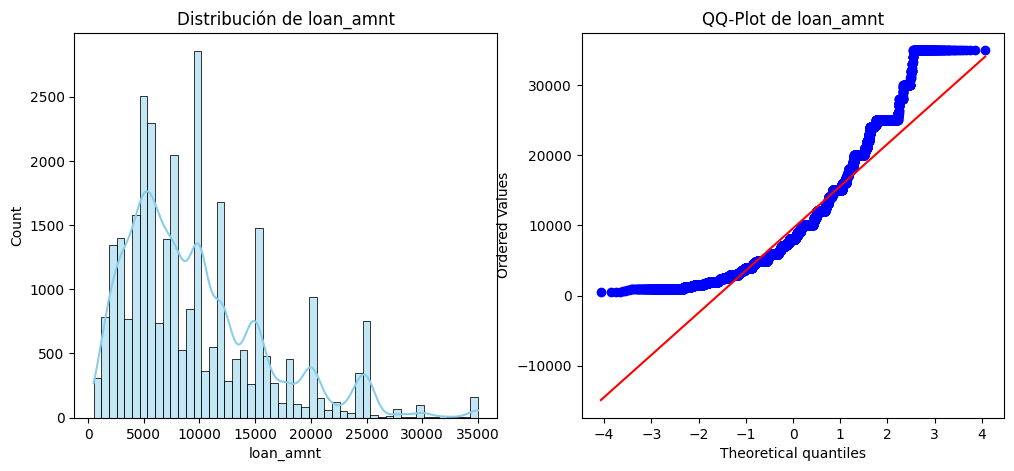


Pruebas de normalidad para la columna: loan_amnt
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 721.35966
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


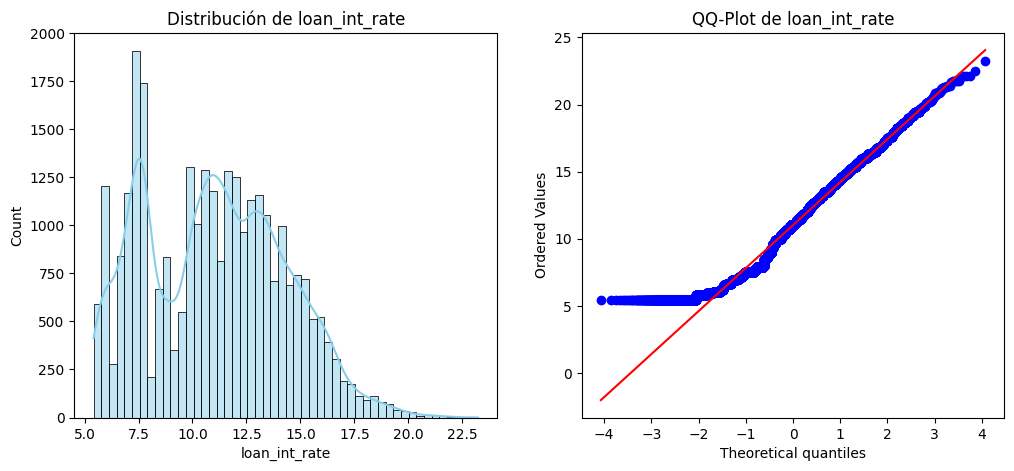


Pruebas de normalidad para la columna: loan_int_rate
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 172.60949
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


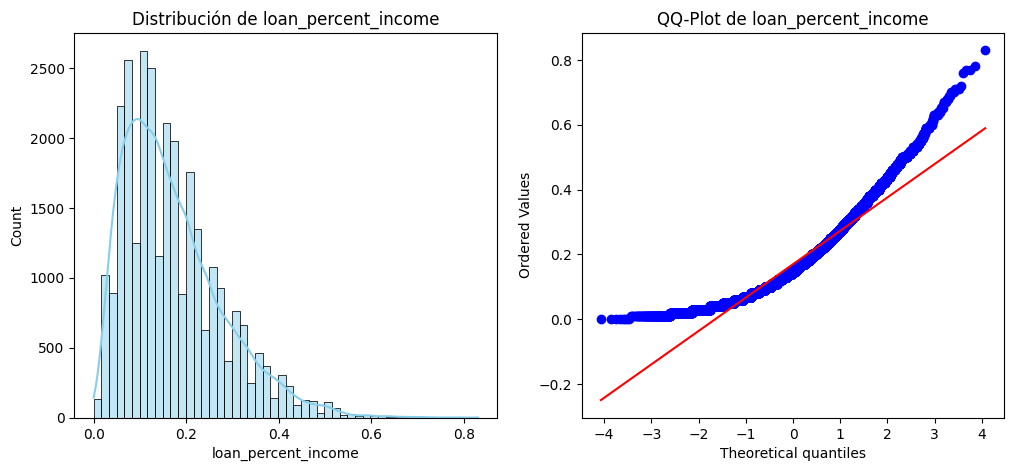


Pruebas de normalidad para la columna: loan_percent_income
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 529.83284
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


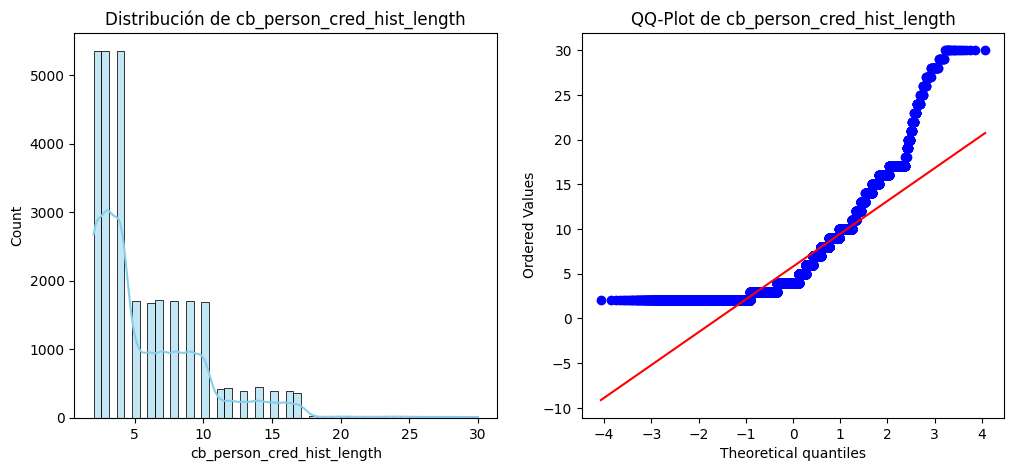


Pruebas de normalidad para la columna: cb_person_cred_hist_length
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 1454.06818
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [50]:
# Aplicar pruebas de normalidad y gráficos a cada columna numérica
for column in cols_num:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

In [51]:
cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

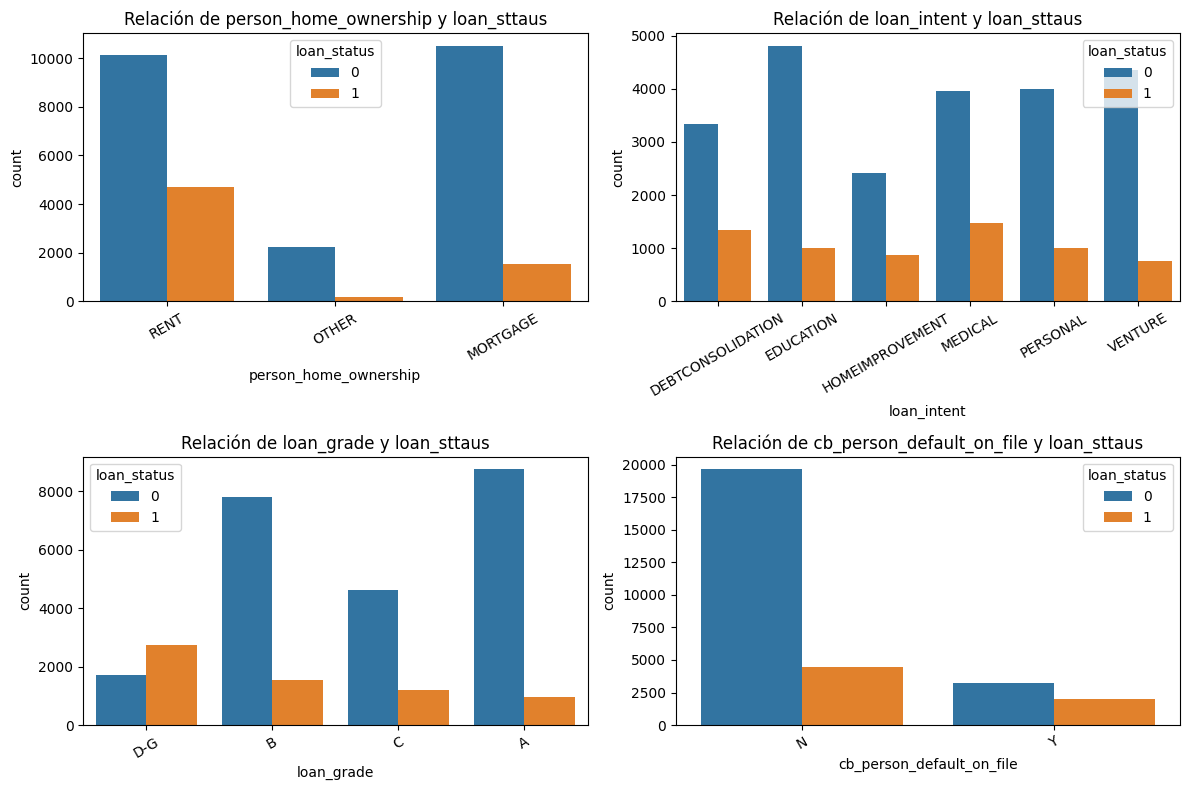

In [52]:
# Crear gráficos de barras
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)  # un gráfico por fila
    sns.countplot(data=df, x=col, hue="loan_status")

    plt.title(f'Relación de {col} y loan_sttaus', fontsize=12)
    plt.xlabel(col, fontsize=10)
    #plt.ylabel('Frecuencia', fontsize=10)
    plt.xticks(rotation=30)  # rotar etiquetas si son largas

plt.tight_layout()
plt.show()

* ¿Cómo se distribuyen los ingresos anuales (person_income)? \
El rango es de \$4,000 a \$6,000,000 con una media de \$66,074. El 75% de las personas se encuentran por debajo de los \$79,200 por lo que es claro la existencia de valores atípicos y una varianza significativa.
* ¿Qué tan dispersa está la tasa de interés (loan_int_rate)? \
De acuerdo con la naturaleza de la variable y el contexto del problema, se considera que existe una alta desviación estándar, ya que hablamos de porcentajes de interés, en ocasiones 1% es considerado un cambio importante, en este caso tenemos 3.2% lo que es bastante variable, con valores que van desde el 5.42% hasta el 23.22%
* ¿Cuáles son los motivos más frecuentes de los créditos (loan_intent)?
El principal motivo es para educación, sin embargo, en porcentaje no difiere mucho del resto de propósitos, por lo que no está desbalanceada significativamente.

# **6. Transformaciones**

In [ ]:
cols_cat = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [ ]:
# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), cols_num),  # Normaliza las variables numéricas
    ("cat", OneHotEncoder(drop='first'), cols_cat)  # Convierte categóricas a variables dummy
])

In [ ]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [ ]:
# Ajustar y transformar el conjunto X
X_pre = preprocessor.fit_transform(X)

# Obtener los nombres de las columnas después de la transformación
cat_features = preprocessor.named_transformers_["cat"].get_feature_names_out(cols_cat)
num_features = cols_num
column_names = list(num_features) + list(cat_features)

# Crear un DataFrame con los datos transformados
X_pre = pd.DataFrame(X_pre, columns=column_names)


In [ ]:
X_pre

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D-G,cb_person_default_on_file_Y
0,-0.908111,-0.113526,28.830642,4.023355,1.543280,3.927646,-0.692597,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-1.066690,-0.911304,0.056561,-1.359618,0.037862,-0.656141,-0.940385,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.432373,-0.911304,-0.918832,-0.647166,0.571545,3.740552,-0.692597,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.749532,-0.008555,-0.187288,4.023355,1.299575,3.366366,-0.940385,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.590952,-0.187813,0.788105,4.023355,1.003427,3.553459,-0.444810,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29316,4.642161,-0.210422,-0.918832,-0.599669,0.661006,-0.562594,5.997657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
29317,4.166423,0.871584,-0.187288,1.272498,-1.088116,-0.188408,3.271998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29318,5.910794,0.161013,-0.431136,4.023355,-0.008411,2.711539,5.502083,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
29319,4.483582,1.356065,0.056561,0.856900,0.142748,-0.656141,5.006509,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Con lo anterior genereamos un dataset listo para ser utilzado para el entrenamiento de un modelo

In [ ]:
X_pre[cols_num].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.932100e+04,2.932100e+04,2.932100e+04,2.932100e+04,2.932100e+04,2.932100e+04,2.932100e+04
mean,1.240742e-16,-1.008103e-16,6.203709e-17,1.008103e-16,-9.693295e-19,-2.500870e-16,-9.305563e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.225269e+00,-1.001741e+00,-1.162680e+00,-1.438779e+00,-1.726685e+00,-1.591608e+00,-9.403846e-01
25%,-7.495315e-01,-4.445878e-01,-6.749839e-01,-7.263270e-01,-9.616365e-01,-7.496878e-01,-6.925974e-01
50%,-2.737940e-01,-1.781235e-01,-1.872876e-01,-2.513588e-01,-8.410936e-03,-1.884078e-01,-4.448102e-01
75%,3.605228e-01,2.110759e-01,5.442568e-01,4.215129e-01,7.566374e-01,5.599656e-01,5.463387e-01
max,1.843855e+01,9.582978e+01,2.883064e+01,4.023355e+00,3.764388e+00,6.172766e+00,5.997657e+00


calculamos las estadísticas básicas nuevamente pero ahora con las transformaciones y observamos que se encuentran dentro de rangos mucho más delimitados y similares entre si

### Análisis de Multicolinealidad ###
                       Variable   VIF
0                    person_age  3.96
1                 person_income  1.51
2             person_emp_length  1.10
3                     loan_amnt  2.20
4                 loan_int_rate  3.96
5           loan_percent_income  2.13
6    cb_person_cred_hist_length  3.87
7   person_home_ownership_OTHER  1.24
8    person_home_ownership_RENT  2.43
9         loan_intent_EDUCATION  1.90
10  loan_intent_HOMEIMPROVEMENT  1.52
11          loan_intent_MEDICAL  1.85
12         loan_intent_PERSONAL  1.77
13          loan_intent_VENTURE  1.81
14                 loan_grade_B  2.53
15                 loan_grade_C  3.94
16               loan_grade_D-G  5.04
17  cb_person_default_on_file_Y  2.03




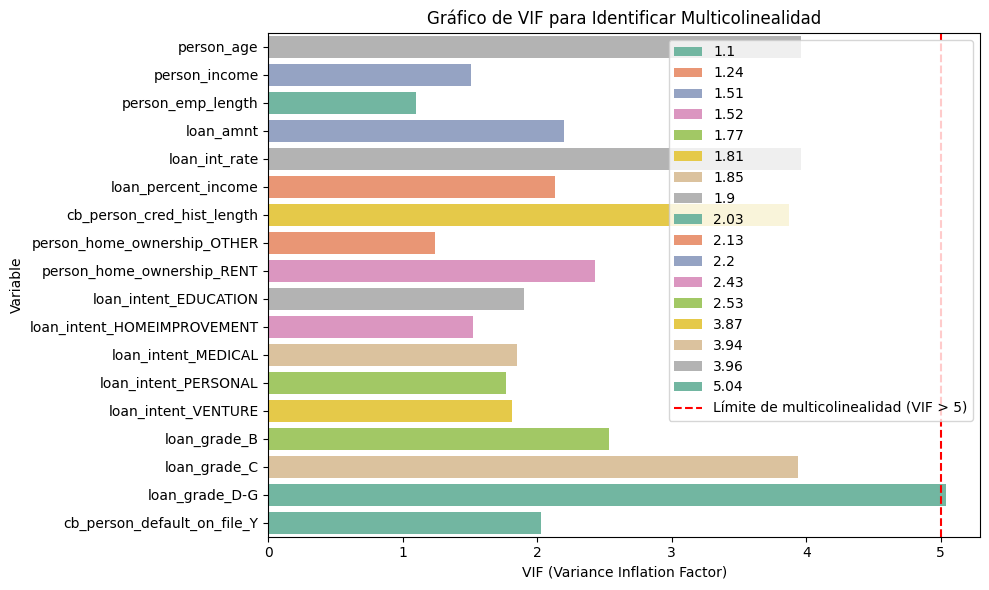

In [ ]:
#Multicolinealidad
# El VIF evalúa la colinealidad de cada variable con respecto a las demás. VIF > 5 o 10 indica posible multicolinealidad.
# Agregar constante para calcular el VIF
#X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X_pre.columns
vif_data['VIF'] = [variance_inflation_factor(X_pre.values, i) for i in range(X_pre.shape[1])]
vif_data['VIF'] = np.round(vif_data['VIF'], 2)

print("### Análisis de Multicolinealidad ###")
print(vif_data)
print('\n')

plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='Set2', hue='VIF')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

Todas las variables tienen un VIF debajo de 5, lo que indica que no existe colinealidad, solo en el caso de la variable generada a partir del one hot encoding "loan_grade_D_G" se observa que supera ligeramente ese umbral, sin embargo, al no ser un modelo de regresión si no de clasificación, se espera que no genera problemas en el entrenamiento del modelo

# **7. Conclusiones parciales**


## **7.1 Principales hallazgos en calidad, análisis descriptivo y preprocesamiento**

En el tema de la calidad de los datos destacan el caso de los valores nulos en dos variables numéricas (person_emp_length, loan_int_rate), así como la presencia de 165 registros duplicados, en el caso de los nulos se imputó con la mediana para el primer caso y se decicidió eliminar dichos registros para el segundo caso, ya que las imputaciones cambiaban significativamente la distribución, lo que poddría sesgar el modelo. En el caso de los duplicados simplemente se optó por eliminarlos, ya que en ese caso al tener todos los valores iguales, no aportan información nueva al modelo. Adicional a eso, solo se tuvo que ajustar el tipo de dato en algunos de variables categóricas, con el propósito de evitar confusiones y manejarlas como numéricas. No se encontraron valores que se salgan del patrón.

Del EDA, destacan varios puntos, el primero es que de las variables numéricas, ninguna se distribuye como una normal, lo que si bien no comprende un problema, debe considerarse en caso de seleccionar cierta clase de modelos que asumen normalidad en los datos o que obtienen mejores resultados cuando se cumple esa condición. \
Otro punto importante a destacar es la alta correlación entre las variables edad y años de historial, en este caso hace sentido, ya que entre mayor sea una persona, la historia crediticia suele aumentar de manera proporcional, en este caso se podría evaluar quedarse solo con alguna de las variables, ya que esa dependencia podría no brindar nueva información para el modelo, otras variables correlacionadas son el monto del crédito y el porcentaje que representa con respecto a sus ingresos, en este caso también se debe a la naturaleza de ambas variables, ya que hace sentido que si una aumenta la otra también lo haga de manera proporcional.
Finalmente, tenemos una target desbalanceada, algo que podría generar problemas de sobreajuste en el modelo, ya que las observaciones para una clase son significativamente superiores a la otra, así que se deberán aplicar técnicas que permitan generalizar el aprendizaje y evitar este problema

## **7.2 Estado de preparación del dataset para fases posteriores.**

Se ha hecho un análisis más detallado de este conjunto de datos, revisando cada una de las variables y manejando los temas de calidad de datos, además de las transformaciones necesarias para convertirlo en un dataset listo para ser usado en el entrenamiento de modelos, dado que hasta este momento no se han visto modelos de clasificación en clase, se deja en este punto.